# Project Introduction

This project aims to analyze the exam results of the students from different campuses of the university located at district towns in order to derive the insights from them. Dataset contains student related details, separate and total marks of the quizzes held in the entire semester. Moreover, this dataset contains 12 columns and 88 records.

# Data Acquisition and Cleaning

The data is available in excel file and to read the data pandas software library is used with the following command.

In [1]:
# import pandas module
import pandas as pd

### Read Dataset

In [2]:
# Reading the 'Dataset.xlsx' in the 'Dataset' with index 'crno'
Dataset = pd.read_excel("Dataset.xlsx", index_col = "crno")

In [3]:
# total number of (rows, cols)
Dataset.shape

(88, 11)

In [4]:
# print first 5 records from the 'Dataset'
Dataset.head()

,stid,sem,q1,q2,q3,q4,total,gen,fname,town,age
crno,,,,,,,,,,,
1,H00774769,201910,22.0,14.0,16,22.0,74.0,1,Omar,Ajman,24.0
2,H00863874,201910,33.0,16.0,3,11.0,63.0,0,Salama,Abu Dhabi,23.0
3,H00680482,201910,35.0,8.0,10,17.0,70.0,1,Abdulaziz,Ajman,21.0
4,H00282876,201910,45.0,23.0,10,2.0,80.0,0,Alya,Fujeirah,19.0
5,H00940349,201910,45.0,8.0,17,11.0,81.0,1,Kalifa,NaN,20.0


In [5]:
# print last 4 records from the 'Dataset'
Dataset.tail()

,stid,sem,q1,q2,q3,q4,total,gen,fname,town,age
crno,,,,,,,,,,,
84,H00012896,201920,33.0,11.0,21,3.0,68.0,1,Abdullah,Dubai,24.0
85,H00635996,201920,38.0,16.0,8,6.0,68.0,0,Ana,Abu Dhabi,19.0
86,H00088333,201920,25.0,8.0,1,6.0,40.0,1,Tom,Sharjah,23.0
87,H00349088,201920,25.0,8.0,1,6.0,40.0,0,Hessa,Ajman,24.0
88,H00687307,201920,38.0,16.0,8,6.0,68.0,1,Nasser,Sharjah,19.0


In [6]:
# Total number of missing values in each column
Dataset.isnull().sum()

stid     0
sem      0
q1       2
q2       2
q3       0
q4       2
total    2
gen      0
fname    2
town     2
age      2
dtype: int64

In [7]:
# Total number of missing values in the entire DataFrame
Dataset.isnull().sum().sum()

14

In our dataset there are 14 Null values. 
In the next cell i will perform dropna(), to drop Null values

In [8]:
# dropping the Null values assign to a new variable
DatasetFinal = Dataset.dropna()

In [9]:
# after perfroming dropna(), checking (rows, cols) from dataset
DatasetFinal.shape

(74, 11)

In [10]:
# now once again checking is there any Null values left?
DatasetFinal.isnull().sum().sum()

0

Now our data is prepared for further analysis.

In [11]:
# before solving the questions i want to show first 5 records from the dataset
DatasetFinal.head()

,stid,sem,q1,q2,q3,q4,total,gen,fname,town,age
crno,,,,,,,,,,,
1,H00774769,201910,22.0,14.0,16,22.0,74.0,1,Omar,Ajman,24.0
2,H00863874,201910,33.0,16.0,3,11.0,63.0,0,Salama,Abu Dhabi,23.0
3,H00680482,201910,35.0,8.0,10,17.0,70.0,1,Abdulaziz,Ajman,21.0
4,H00282876,201910,45.0,23.0,10,2.0,80.0,0,Alya,Fujeirah,19.0
6,H00312749,201910,34.0,10.0,2,24.0,70.0,0,Ruda,Fujeirah,22.0


# Analysis Questions/Exploratory Analysis/Data Visualization

# 1- What is the average of the ages?

In [12]:
# mean()
DatasetFinal.age.mean()

21.60810810810811

# 2- How many female students got more than 40 in quiz 1 from the male students?

In [13]:
# step1: Calculate total students got more that 40 in 'q1'
TotalStudentsGot = DatasetFinal[DatasetFinal.q1 > 40]
#print(TotalStudentsGot)

# step2: Calculate total male students got more that 40
TotalMaleStudentsGot = TotalStudentsGot[TotalStudentsGot.gen == 1]
#print(TotalMaleStudentsGot)

# step3: Calculate total female students got more than 40
TotalFemaleStudentsGot = TotalStudentsGot[TotalStudentsGot.gen == 0]
#print(TotalFemaleStudentsGot)

# FinalStep:
print(f"{len(TotalFemaleStudentsGot) - len(TotalMaleStudentsGot)} female students got more than 40 in quiz 1 from the male students")

5 female students got more than 40 in quiz 1 from the male students


# 3- How many male students in Ajman & their age is below 20?

In [14]:
# conditional operation
DatasetFinal[(DatasetFinal.gen == 1) & (DatasetFinal.age < 20) & (DatasetFinal.town == 'Ajman')]

,stid,sem,q1,q2,q3,q4,total,gen,fname,town,age
crno,,,,,,,,,,,
16,H00729219,201910,31.0,15.0,6,15.0,67.0,1,Ahmad,Ajman,19.0
60,H00729219,201920,21.0,24.0,23,10.0,78.0,1,Ahmad,Ajman,19.0


In [15]:
print(f"{str(len(DatasetFinal[(DatasetFinal.gen == 1) & (DatasetFinal.age < 20) & (DatasetFinal.town == 'Ajman')]))} male students in Ajman are aged below 20")

2 male students in Ajman are aged below 20


# 4- How many students living in each town?

In [16]:
# groupby()
# grouping based on towns
DatasetFinal.groupby('town')['town'].count()

town
Abu Dhabi    16
Ajman        16
Dubai        16
Fujeirah     11
Sharjah      15
Name: town, dtype: int64

# 5- Sort all records using the total column descending?

In [17]:
# sort records in descending order using 'total' col
DescendingOrder = DatasetFinal.sort_values('total', ascending=False)
DescendingOrder.head()

,stid,sem,q1,q2,q3,q4,total,gen,fname,town,age
crno,,,,,,,,,,,
67,H00367866,201920,44.0,17.0,22,13.0,96.0,0,Hessina,Sharjah,22.0
22,H00781307,201910,44.0,17.0,22,13.0,96.0,1,Hassan,Abu Dhabi,19.0
64,H00750429,201920,37.0,7.0,23,25.0,92.0,1,Mayed,Dubai,20.0
53,H00659219,201920,32.0,24.0,18,17.0,91.0,1,Tarski,Abu Dhabi,24.0
8,H00568498,201910,32.0,24.0,18,17.0,91.0,0,Amna,Dubai,22.0


# 6- Sort the ages of the female students?

In [18]:
# copy the original dataframe
FemaleStudents = DatasetFinal[DatasetFinal.gen == 0].copy()
FemaleStudents.sort_values('age', inplace=True)
FemaleStudents.head()

,stid,sem,q1,q2,q3,q4,total,gen,fname,town,age
crno,,,,,,,,,,,
4,H00282876,201910,45.0,23.0,10,2.0,80.0,0,Alya,Fujeirah,19.0
48,H00282876,201920,35.0,8.0,10,17.0,70.0,0,Alya,Fujeirah,19.0
85,H00635996,201920,38.0,16.0,8,6.0,68.0,0,Ana,Abu Dhabi,19.0
41,H00635996,201910,29.0,22.0,16,3.0,70.0,0,Ana,Abu Dhabi,19.0
18,H00326181,201910,22.0,19.0,5,13.0,59.0,0,Reem,Sharjah,19.0


# 7- Sort the ages of Dubai campus students?

In [19]:
Dubai = DatasetFinal[DatasetFinal.town == 'Dubai'].copy()
Dubai.sort_values('age', inplace=True)
Dubai.head()

,stid,sem,q1,q2,q3,q4,total,gen,fname,town,age
crno,,,,,,,,,,,
20,H00750429,201910,34.0,5.0,9,24.0,72.0,1,Mayed,Dubai,20.0
33,H00241167,201910,44.0,8.0,10,22.0,84.0,0,Nouf,Dubai,20.0
64,H00750429,201920,37.0,7.0,23,25.0,92.0,1,Mayed,Dubai,20.0
77,H00241167,201920,44.0,8.0,10,22.0,84.0,0,Nouf,Dubai,20.0
11,H00128176,201910,21.0,18.0,7,1.0,47.0,0,Shaika,Dubai,21.0


# 8- Visualize the ages using Pie chart?

<AxesSubplot:ylabel='Ages'>

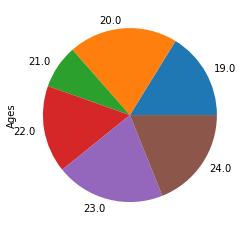

In [20]:
# pie chart
# visualizing the ages
DatasetFinal.groupby(['age']).size().plot(kind='pie', label='Ages')

# 9- Visualize the total marks in bar chart?

In [21]:
# bar chart
# visualizing the total marks with the ranges "0-20","21-40","41-60","61-80","81-100"
DatasetFinal['bins'] = pd.cut(DatasetFinal['total'],bins=[0,20,40,60, 80, 100], labels=["0-20","21-40","41-60","61-80","81-100"])

C:\Users\saurav\AppData\Local\Temp/ipykernel_13284/2192586002.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DatasetFinal['bins'] = pd.cut(DatasetFinal['total'],bins=[0,20,40,60, 80, 100], labels=["0-20","21-40","41-60","61-80","81-100"])


<AxesSubplot:xlabel='bins'>

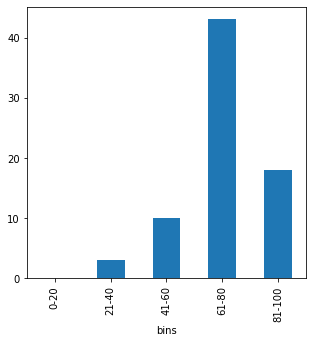

In [22]:
DatasetFinal.groupby('bins').size().plot.bar(figsize=(5, 5), x = "Bins", y = "Total Marks")

# 10- Visualize the marks of quiz 4 ?

In [23]:
# visualization the marks of quiz 4
# with the ranges "0-5","6-10","11-15","16-20","21-25"
DatasetFinal['bins'] = pd.cut(DatasetFinal['q4'],bins=[0,5,10,15,20,25], labels=["0-5","6-10","11-15","16-20","21-25"])

C:\Users\saurav\AppData\Local\Temp/ipykernel_13284/1178868139.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DatasetFinal['bins'] = pd.cut(DatasetFinal['q4'],bins=[0,5,10,15,20,25], labels=["0-5","6-10","11-15","16-20","21-25"])


<AxesSubplot:xlabel='bins'>

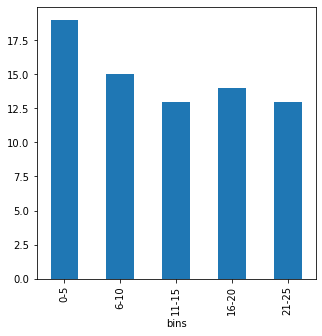

In [24]:
DatasetFinal.groupby('bins').size().plot.bar(figsize=(5, 5), x='Bins', y='Q4 Marks')